# Baseline of the Project
Example of MLP for Ad Classification using sklearn.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("data/ad/ad.data", header=None, skipinitialspace=True, low_memory=False)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [5]:
%matplotlib inline

In [6]:
df = df.replace('?', np.nan)
df

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,170,94,0.5529,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3275,101,140,1.3861,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3276,23,120,5.2173,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3277,NaN,NaN,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.


In [7]:
df.nunique()

0       220
1       277
2       780
3         2
4         2
       ... 
1554      2
1555      2
1556      2
1557      2
1558      2
Length: 1559, dtype: int64

In [8]:
df.shape

(3279, 1559)

In [9]:
df.isna().sum()

0       903
1       901
2       910
3        15
4         0
       ... 
1554      0
1555      0
1556      0
1557      0
1558      0
Length: 1559, dtype: int64

In [10]:
df.dropna(inplace=True)
df.isna().sum()

0       0
1       0
2       0
3       0
4       0
       ..
1554    0
1555    0
1556    0
1557    0
1558    0
Length: 1559, dtype: int64

In [11]:
df[0] = df[0].astype(float)
df[1] = df[1].astype(float)
df[2] = df[2].astype(float)
df[3] = df[3].astype(int)
df.dtypes

0       float64
1       float64
2       float64
3         int32
4         int64
         ...   
1554      int64
1555      int64
1556      int64
1557      int64
1558     object
Length: 1559, dtype: object

In [12]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558_nonad.
0,125.0,125.0,1.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57.0,468.0,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33.0,230.0,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60.0,468.0,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60.0,468.0,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X = df.drop('1558_nonad.', axis=1)
y = df['1558_nonad.']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [15]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='sgd', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1).fit(X_train, y_train)

Accuracy:  0.8192090395480226
Precision:  0.8192090395480226
Recall:  1.0
F-Measure Test: 0.901
F-Measure Train: 0.917


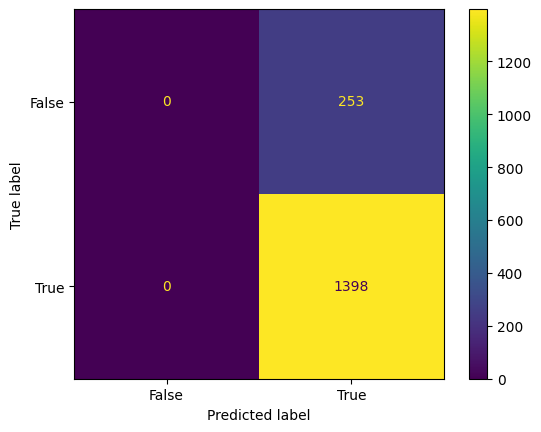

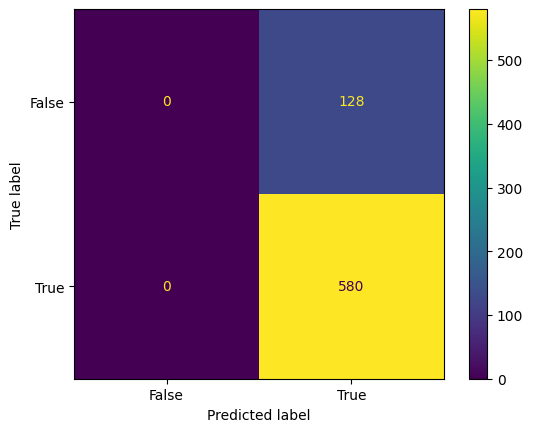

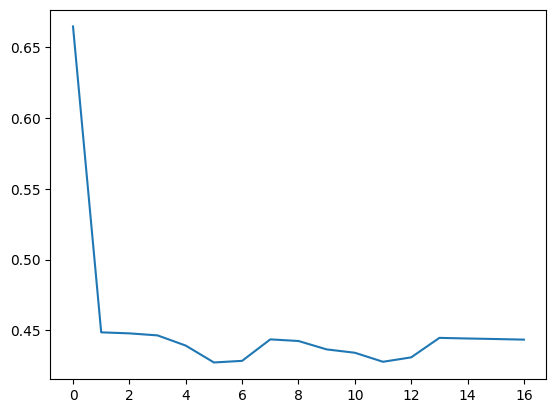

In [18]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics

y_pred = mlp.predict(X_test)
y_train_pred = mlp.predict(X_train)
print('Accuracy: ', mlp.score(X_test, y_test))

#calculating precision and reall


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
 
print('Precision: ',precision)
print('Recall: ',recall)

scoreTrain = f1_score(y_train, y_train_pred, average='binary')
scoreTest = f1_score(y_test, y_pred, average='binary')
print('F-Measure Test: %.3f' % scoreTest)
print('F-Measure Train: %.3f' % scoreTrain)

confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

plt.plot(mlp.loss_curve_)
plt.show()
 
